In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split

# Reading data

In [3]:
dataset=pd.read_excel("/content/Dataset#1.xlsx")


# **Describing,Understanding the data**


In [ ]:
dataset.size

231387

In [ ]:
dataset.shape

(13611, 17)

In [ ]:
dataset.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature1   13611 non-null  int64  
 1   Feature2   13611 non-null  float64
 2   Feature3   13611 non-null  float64
 3   Feature4   13611 non-null  float64
 4   Feature5   13611 non-null  float64
 5   Feature6   13611 non-null  float64
 6   Feature7   13611 non-null  int64  
 7   Feature8   13611 non-null  float64
 8   Feature9   13611 non-null  float64
 9   Feature10  13611 non-null  float64
 10  Feature11  13611 non-null  float64
 11  Feature12  13611 non-null  float64
 12  Feature13  13611 non-null  float64
 13  Feature14  13611 non-null  float64
 14  Feature15  13611 non-null  float64
 15  Feature16  13611 non-null  float64
 16  Class      13611 non-null  object 
dtypes: float64(14), int64(2), object(1)
memory usage: 1.8+ MB


In [ ]:
dataset.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
dataset.isna().sum()

Feature1     0
Feature2     0
Feature3     0
Feature4     0
Feature5     0
Feature6     0
Feature7     0
Feature8     0
Feature9     0
Feature10    0
Feature11    0
Feature12    0
Feature13    0
Feature14    0
Feature15    0
Feature16    0
Class        0
dtype: int64

# **Exploratory Data Analysis**

In [ ]:
dataset.duplicated().sum()

68

In [ ]:
duplicates = dataset[dataset.duplicated()]
print("Duplicate rows:",duplicates)

Duplicate rows:       Feature1  Feature2    Feature3    Feature4  Feature5  Feature6  \
5505     33518   702.956  277.571399  154.305581  1.798842  0.831240   
5509     33954   716.750  277.368480  156.356326  1.773951  0.825970   
5548     38427   756.323  306.533886  160.591784  1.908777  0.851782   
5554     38891   791.343  319.499996  156.869619  2.036723  0.871168   
5599     40804   790.802  323.475648  163.287717  1.981016  0.863241   
...        ...       ...         ...         ...       ...       ...   
7263     63408  1005.966  412.551649  196.337705  2.101235  0.879494   
7278     63882  1004.206  411.263403  198.765453  2.069089  0.875452   
7285     63948   996.497  412.297178  198.877557  2.073121  0.875971   
7340     65766  1035.842  406.416622  207.242369  1.961069  0.860218   
7342     65781  1039.257  409.713859  204.992832  1.998674  0.865834   

      Feature7    Feature8  Feature9  Feature10  Feature11  Feature12  \
5505     34023  206.582775  0.808383   0.98515

In [4]:
#Check the distribution of classes
class_distribution = dataset['Class'].value_counts()

# Display the class distribution
print("Class Distribution:")
print(class_distribution)

Class Distribution:
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


In [ ]:
dataset.hist(bins=40,figsize=(20,15))
plt.show()

**Boxplot of features Which contains abnormal points**

<Axes: xlabel='Feature1', ylabel='Class'>

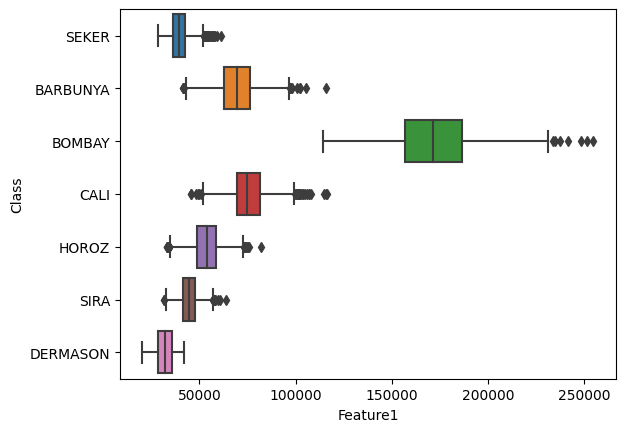

In [ ]:
sns.boxplot(x='Feature1',y='Class',data=dataset)

<Axes: xlabel='Feature2', ylabel='Class'>

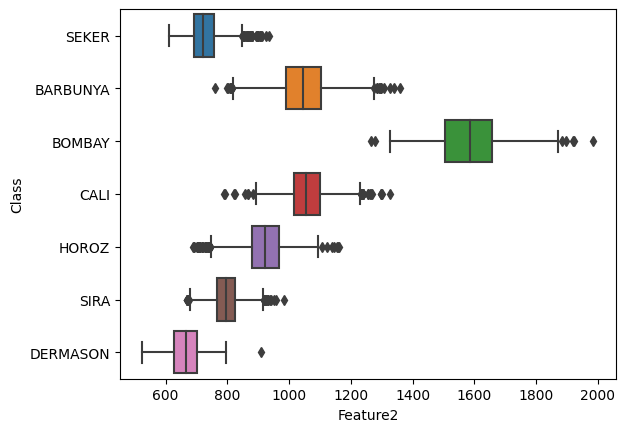

In [ ]:
sns.boxplot(x='Feature2',y='Class',data=dataset)

<Axes: xlabel='Feature3', ylabel='Class'>

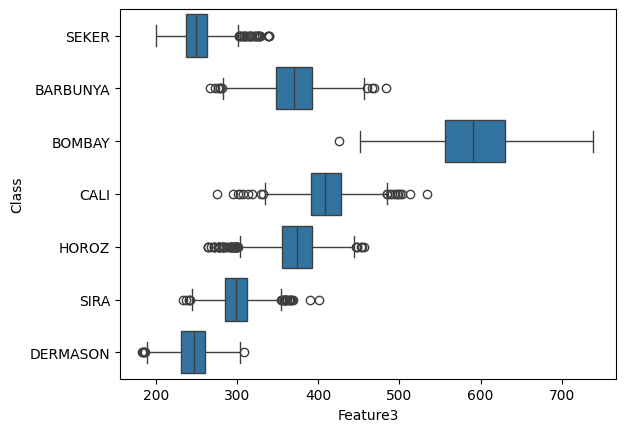

In [5]:
sns.boxplot(x='Feature3',y='Class',data=dataset)

<Axes: xlabel='Feature4', ylabel='Class'>

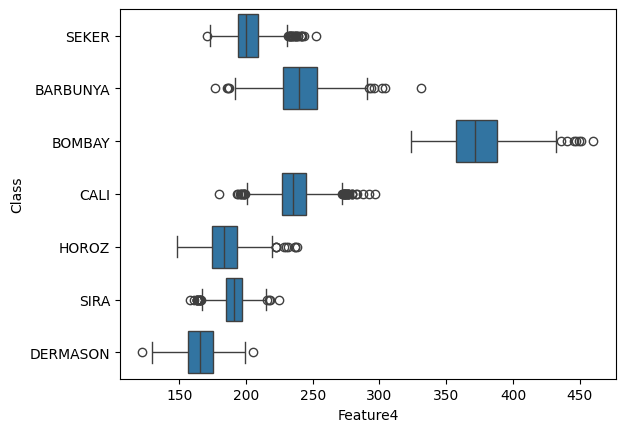

In [6]:
sns.boxplot(x='Feature4',y='Class',data=dataset)

<Axes: xlabel='Feature7', ylabel='Class'>

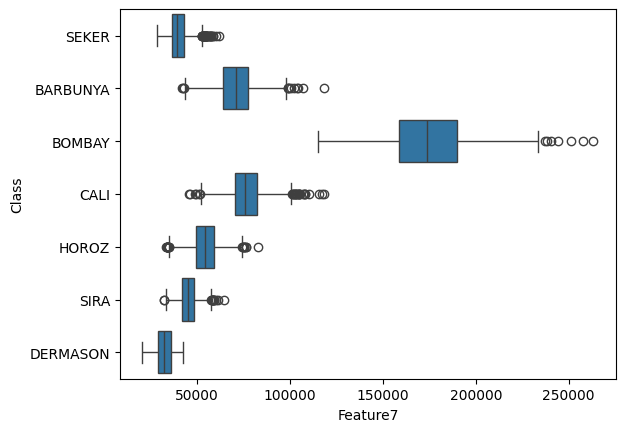

In [7]:
sns.boxplot(x='Feature7',y='Class',data=dataset)

<Axes: xlabel='Feature8', ylabel='Class'>

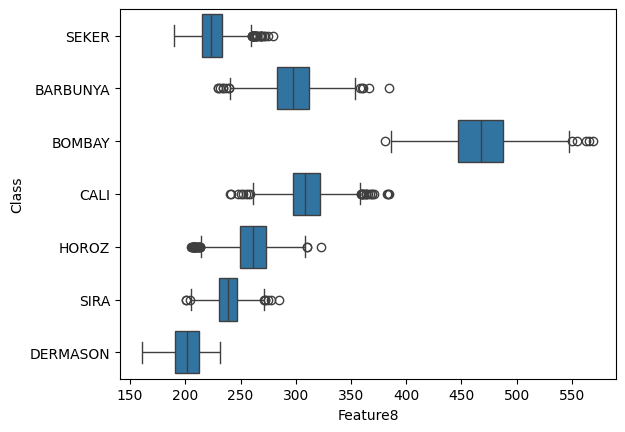

In [8]:
sns.boxplot(x='Feature8',y='Class',data=dataset)

<Axes: xlabel='Feature13', ylabel='Class'>

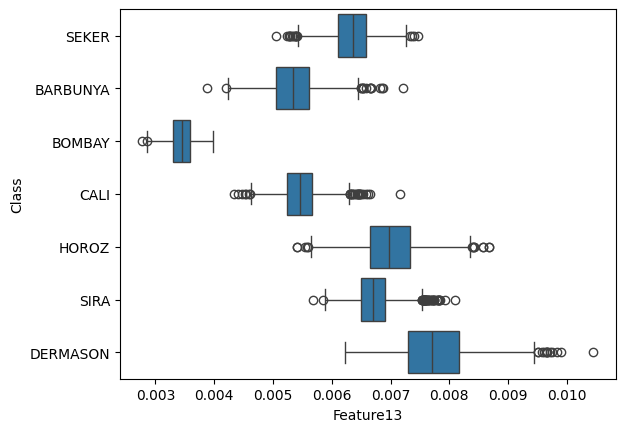

In [9]:
sns.boxplot(x='Feature13',y='Class',data=dataset)

<ipython-input-10-671c7dac8a0d>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=dataset.quantile(0.25)
<ipython-input-10-671c7dac8a0d>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=dataset.quantile(0.75)
<ipython-input-10-671c7dac8a0d>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_table=((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).sum()


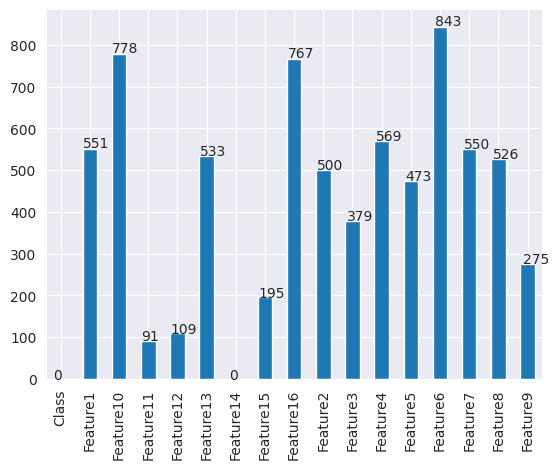

In [10]:
#count outliers
Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
IQR=Q3-Q1
outliers_table=((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).sum()
sns.set_style('darkgrid')
ax=outliers_table.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

**Label encoding**

In [ ]:
dataset['Class'] = dataset['Class'].replace({'SEKER': 1,'BARBUNYA':2,'BOMBAY':3,'CALI':4,'HOROZ':5,'SIRA':6,'DERMASON':7})

""" or can apply
LE = LabelEncoder()
dataset['Class'] = LE.fit_transform(dataset['Class'])"""


" or can apply\nLE = LabelEncoder()\ndataset['Class'] = LE.fit_transform(dataset['Class'])"

In [ ]:
dataset

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,1
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,1
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,1
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,1
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,7
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,7
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,7
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,7


**correlations**

In [ ]:
dataset.corr()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Class
Feature1,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721,-0.340545
Feature2,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310,-0.369302
Feature3,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527,-0.257785
Feature4,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749,-0.511069
Feature5,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264,0.270598
Feature6,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354,0.426551
Feature7,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049,-0.340615
Feature8,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512,-0.385540
Feature9,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502,-0.137064
Feature10,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163,0.034980


In [ ]:
correlations = dataset.corrwith(dataset['Class'])
print(correlations)

Feature1    -0.340545
Feature2    -0.369302
Feature3    -0.257785
Feature4    -0.511069
Feature5     0.270598
Feature6     0.426551
Feature7    -0.340615
Feature8    -0.385540
Feature9    -0.137064
Feature10    0.034980
Feature11    0.024766
Feature12   -0.331373
Feature13    0.622466
Feature14   -0.025269
Feature15   -0.352531
Feature16   -0.038765
Class        1.000000
dtype: float64


 **Feature Selection**

In [ ]:
corr_matrix = dataset.corr()

#threshold for high correlation
threshold = .8
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop highly correlated features
dataset = dataset.drop(to_drop, axis=1)


<ipython-input-55-2fddf45684b1>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
dataset

,Feature1,Feature5,Feature9,Feature10,Feature11,Feature12,Feature13,Feature16,Class
0,28395,1.197191,0.763923,0.988856,0.958027,0.913358,0.007332,0.998724,1
1,28734,1.097356,0.783968,0.984986,0.887034,0.953861,0.006979,0.998430,1
2,29380,1.209713,0.778113,0.989559,0.947849,0.908774,0.007244,0.999066,1
3,30008,1.153638,0.782681,0.976696,0.903936,0.928329,0.007017,0.994199,1
4,30140,1.060798,0.773098,0.990893,0.984877,0.970516,0.006697,0.999166,1
...,...,...,...,...,...,...,...,...,...
13606,42097,1.552728,0.714574,0.990331,0.916603,0.801865,0.006858,0.998385,7
13607,42101,1.476439,0.799943,0.990752,0.922015,0.822252,0.006688,0.998219,7
13608,42139,1.472582,0.729932,0.989899,0.918424,0.822730,0.006681,0.996767,7
13609,42147,1.489326,0.705389,0.987813,0.907906,0.817457,0.006724,0.995222,7


# **Train Validation Test split**

In [ ]:
X=dataset.iloc[:,:-1]
y=dataset['Class']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Train set size: 9527
Validation set size: 2042
Test set size: 2042


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

 **Decision Tree**

In [ ]:
DTree= DecisionTreeClassifier(random_state=45)
DTree.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=45)

In [ ]:
pred_train = DTree.predict(X_resampled)
pred_test = DTree.predict(X_test)

**Confusion Matrix**

In [ ]:
cm = np.array(confusion_matrix(pred_test,y_test))
cm

array([[296,   3,   0,   2,   0,  15,  12],
       [  3, 177,   0,  14,   4,   3,   0],
       [  0,   0,  78,   0,   0,   0,   0],
       [  2,  15,   0, 215,   5,   0,   0],
       [  0,   2,   0,   7, 284,   7,   0],
       [ 12,   1,   0,   1,   7, 324,  55],
       [ 10,   0,   0,   0,   1,  45, 442]])

[Text(0.4583333333333333, 0.875, 'x[6] <= 0.004\ngini = 0.857\nsamples = 17521\nvalue = [2503, 2503, 2503, 2503, 2503, 2503, 2503]'), Text(0.25, 0.625, 'x[0] <= 116500.5\ngini = 0.001\nsamples = 2504\nvalue = [0, 1, 2503, 0, 0, 0, 0]'), Text(0.16666666666666666, 0.375, 'x[4] <= 0.832\ngini = 0.219\nsamples = 8\nvalue = [0, 1, 7, 0, 0, 0, 0]'), Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0, 0]'), Text(0.25, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7, 0, 0, 0, 0]'), Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 2496\nvalue = [0, 0, 2496, 0, 0, 0, 0]'), Text(0.6666666666666666, 0.625, 'x[5] <= 0.728\ngini = 0.833\nsamples = 15017\nvalue = [2503, 2502, 0, 2503, 2503, 2503, 2503]'), Text(0.5, 0.375, 'x[6] <= 0.006\ngini = 0.145\nsamples = 2415\nvalue = [0, 17, 0, 159, 2227, 10, 2]'), Text(0.4166666666666667, 0.125, 'gini = 0.158\nsamples = 142\nvalue = [0, 7, 0, 130, 5, 0, 0]'), Text(0.5833333333333334, 0.125, 'gini = 0.044\nsamples = 2

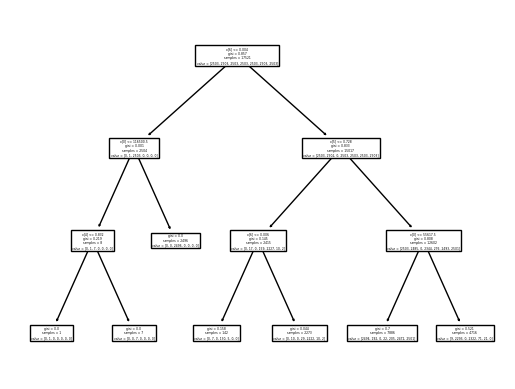

In [ ]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=3)
clf_tree.fit(X_resampled, y_resampled)
print(tree.plot_tree(clf_tree))

 **Accuracy Decision Tree**

In [ ]:
print("Accuracy of training data:", accuracy_score(y_resampled, pred_train)*100)
ac1 = accuracy_score(y_test, pred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 100.0
Accuracy of testing data: 88.93241919686582



**K-Nearest Neighbors**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred_train = knn.predict(X_resampled)
pred_test = knn.predict(X_test)

**Confusion Matrix**

In [ ]:
cm = np.array(confusion_matrix(pred_test,y_test))
cm

array([[151,   5,   0,   0,  27, 102, 114],
       [  1,  74,   0, 104,  48,   5,   0],
       [  0,   0,  78,   0,   0,   0,   0],
       [  2,  71,   0, 118,  19,   3,   0],
       [ 22,  44,   0,  17, 148,  63,   4],
       [ 81,   4,   0,   0,  54, 203,  23],
       [ 66,   0,   0,   0,   5,  18, 368]])

 **Accuracy KNN**

In [ ]:
print("Accuracy of training data:", accuracy_score(y_resampled, pred_train)*100)
ac2 = accuracy_score(y_test, pred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 90.788197020718
Accuracy of testing data: 55.827619980411356


**Random Forest**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_resampled,y_resampled)

RandomForestClassifier()

In [ ]:
pred_train = rf.predict(X_resampled)
pred_test = rf.predict(X_test)

**Confusion Matrix**

In [ ]:
cm = np.array(confusion_matrix(pred_test,y_test))
cm

array([[309,   1,   0,   2,   0,   6,   8],
       [  2, 187,   0,   6,   2,   0,   0],
       [  0,   0,  78,   0,   0,   0,   0],
       [  0,   9,   0, 225,   6,   1,   0],
       [  0,   1,   0,   5, 285,   4,   1],
       [  7,   0,   0,   1,   7, 346,  32],
       [  5,   0,   0,   0,   1,  37, 468]])

**Accuracy Random Forest**

In [ ]:
print("Accuracy of training data:", accuracy_score(y_resampled, pred_train)*100)
ac3 = accuracy_score(y_test, pred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 100.0
Accuracy of testing data: 92.94809010773751


In [ ]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           1       0.95      0.96      0.95       323
           2       0.94      0.94      0.94       198
           3       1.00      1.00      1.00        78
           4       0.93      0.93      0.93       239
           5       0.97      0.95      0.96       301
           6       0.87      0.90      0.88       394
           7       0.92      0.91      0.92       509

    accuracy                           0.93      2042
   macro avg       0.94      0.94      0.94      2042
weighted avg       0.93      0.93      0.93      2042



**Compare Models Accuracy**

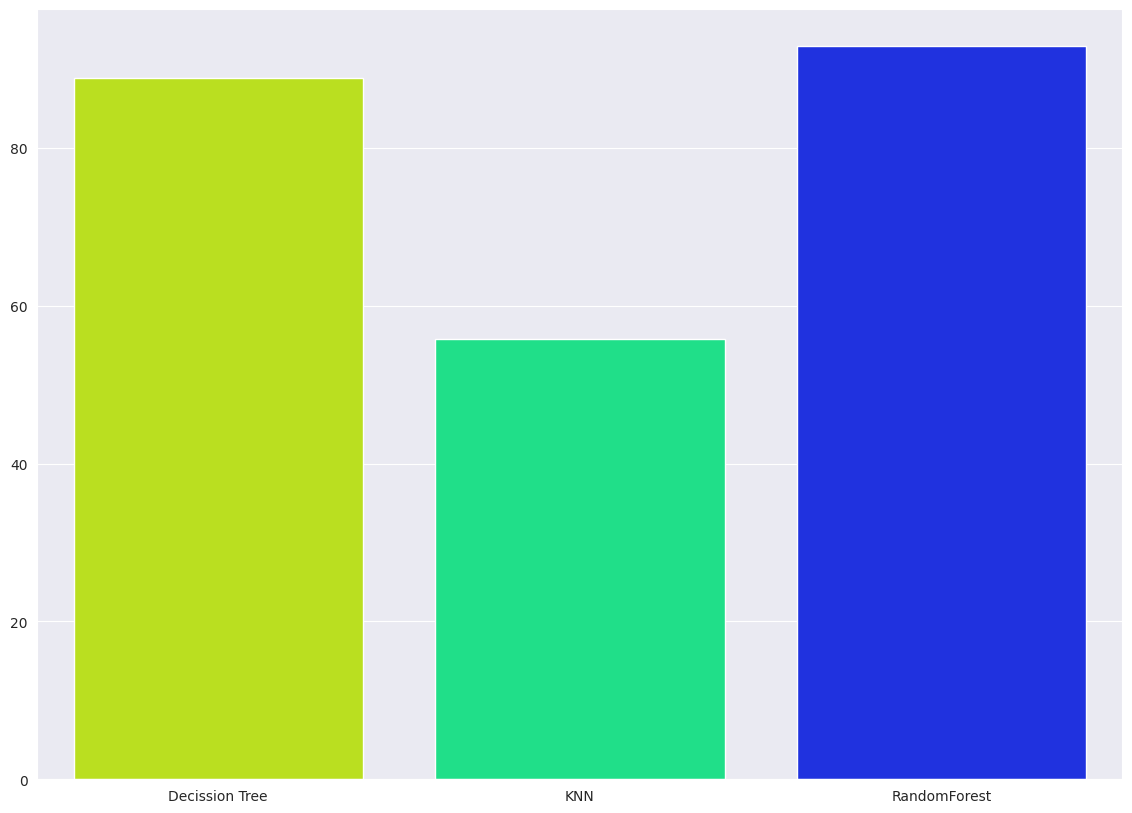

In [ ]:
accuracy =  {ac1: 'Decission Tree', ac2:'KNN', ac3:'RandomForest'}
plt.figure(figsize=(14, 10))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');

In [ ]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))